# Neural Networks (CPU)
### ...using Keras and a MacBook

### load, sample, split data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_0.csv').sample(10000)

y = df['isFraud']
X = df.drop(columns = ['isFraud'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

del df, X, y, train_test_split

### simple Keras NN

In [80]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [85]:
model = Sequential()

model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 20)                8040      
_________________________________________________________________
dense_95 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 11        
Total params: 8,261
Trainable params: 8,261
Non-trainable params: 0
_________________________________________________________________


In [86]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
7500/7500 [==============================] - 2s 333us/step - loss: 0.5717 - acc: 0.9645
Epoch 2/10
7500/7500 [==============================] - 0s 39us/step - loss: 0.5717 - acc: 0.9645
Epoch 3/10
7500/7500 [==============================] - 0s 39us/step - loss: 0.5717 - acc: 0.9645
Epoch 4/10
7500/7500 [==============================] - 0s 40us/step - loss: 0.5717 - acc: 0.9645
Epoch 5/10
7500/7500 [==============================] - 0s 39us/step - loss: 0.5717 - acc: 0.9645
Epoch 6/10
7500/7500 [==============================] - 0s 40us/step - loss: 0.5717 - acc: 0.9645
Epoch 7/10
7500/7500 [==============================] - 0s 39us/step - loss: 0.5717 - acc: 0.9645
Epoch 8/10
7500/7500 [==============================] - 0s 40us/step - loss: 0.5717 - acc: 0.9645
Epoch 9/10
7500/7500 [==============================] - 0s 46us/step - loss: 0.5717 - acc: 0.9645
Epoch 10/10
7500/7500 [==============================] - 0s 44us/step - loss: 0.5717 - acc: 0.9645


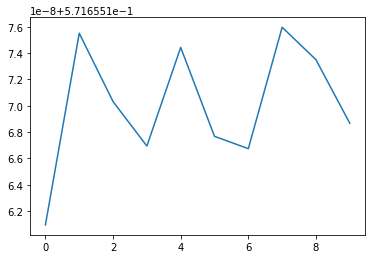

In [89]:
pyplot.plot(history.history['loss'], label='train')
pyplot.show()

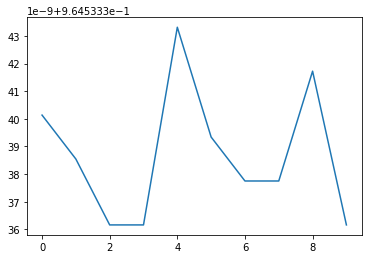

In [90]:
pyplot.plot(history.history['acc'], label='test')
pyplot.show()

In [ ]:
n_layers = trial.suggest_int('n_layers', 1, 3)

layers = []
for i in range(n_layers):
    n_units = int(trial.suggest_loguniform('n_units_l{}'.format(i), 4, 128))
    layers.append(L.Linear(None, n_units))
    layers.append(F.relu)
layers.append(L.Linear(None, 10))

return chainer.Sequential(*layers)